# Turning images into heatmaps 
### (Python,Scikit-image)

I have selected a pretty butterfly from pixabay [image link](https://pixabay.com/ru/photos/%d0%b1%d0%b0%d0%b1%d0%be%d1%87%d0%ba%d0%b0-lycaena-dispar-7320158/) The original rgb image size was 1293 height and 1920 width. The LinkedIn background stripe size is about 600 height and 2000 width. So, the image should be cropped. <br>


To read more please read medium article [link](https://medium.com/@ttatyana.pichugina/turning-images-into-heatmaps-a703ce545755)
### Load image

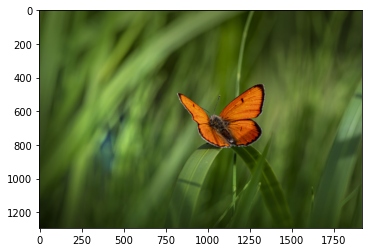

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import skimage.io as io

# Load original image
img=io.imread("test_img.jpg")
plt.imshow(img);


### Cut the stripe with a butterfly

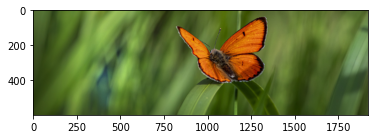

In [5]:
# Cut the stripe
import numpy as np
img_cut=img[400:1000,:,:]
plt.imshow(img_cut);

###  Convert image to gray

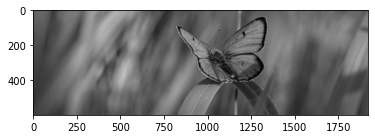

In [6]:
# Convert to gray
from skimage.color import rgb2gray
gray_img = rgb2gray(img_cut)
plt.imshow(gray_img,cmap='gray')

### Pixelated artwork effect

The aim of this step is to make the image look like pixelated artwork. The image is divided into non-overlapping blocks. How to work with blocks I have found here [link]( https://tirthajyoti.github.io/Scikit-image-book/Block_view_mean_max_median_sampling.html). 
 

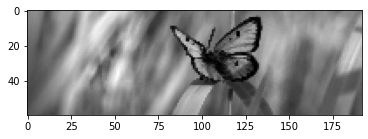

In [9]:
from skimage import util

# select box size
block_shape = (10, 10) 
view = util.view_as_blocks(gray_img, block_shape)

# collapse the last two dimensions in one
flatten_view = view.reshape(view.shape[0], view.shape[1], -1)

# choose min within box
max_view = np.min(flatten_view, axis=2)
plt.imshow(min_view,cmap='gray')

### Choose colormap for heatmap

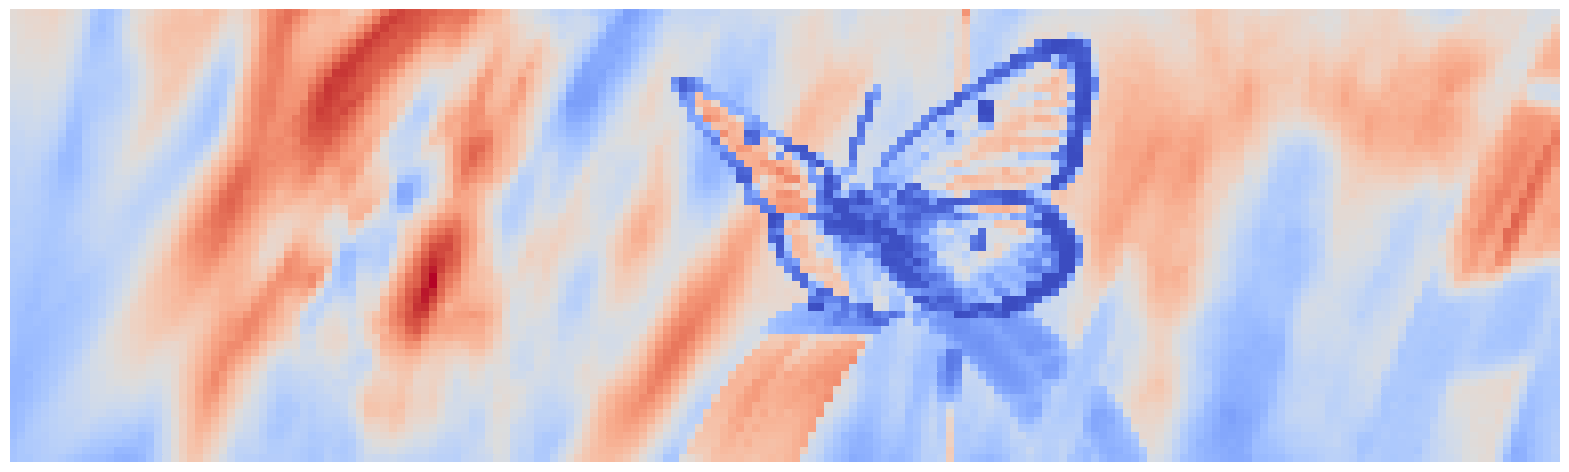

In [10]:
import seaborn as sns

# save figure for LinkedIn recommended size (2000 width, 600 height)
my_dpi=96
plt.figure(figsize=(2000/my_dpi, 600/my_dpi), dpi=my_dpi) 
sns.heatmap(max_view,xticklabels=False,yticklabels=False,cmap="coolwarm",cbar=False)
plt.savefig("coolwarm.png",bbox_inches='tight')


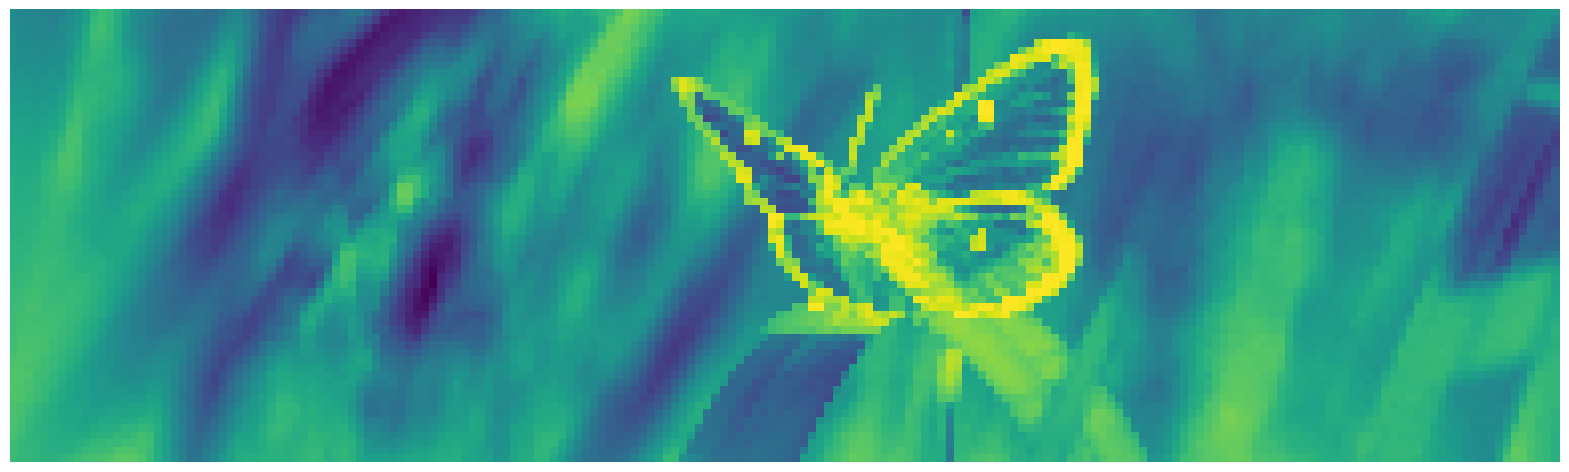

In [11]:
my_dpi=96
plt.figure(figsize=(2000/my_dpi, 600/my_dpi), dpi=my_dpi)
sns.heatmap(util.invert(max_view),xticklabels=False,yticklabels=False,cmap="viridis",cbar=False)
plt.savefig("viridis.png",bbox_inches='tight')

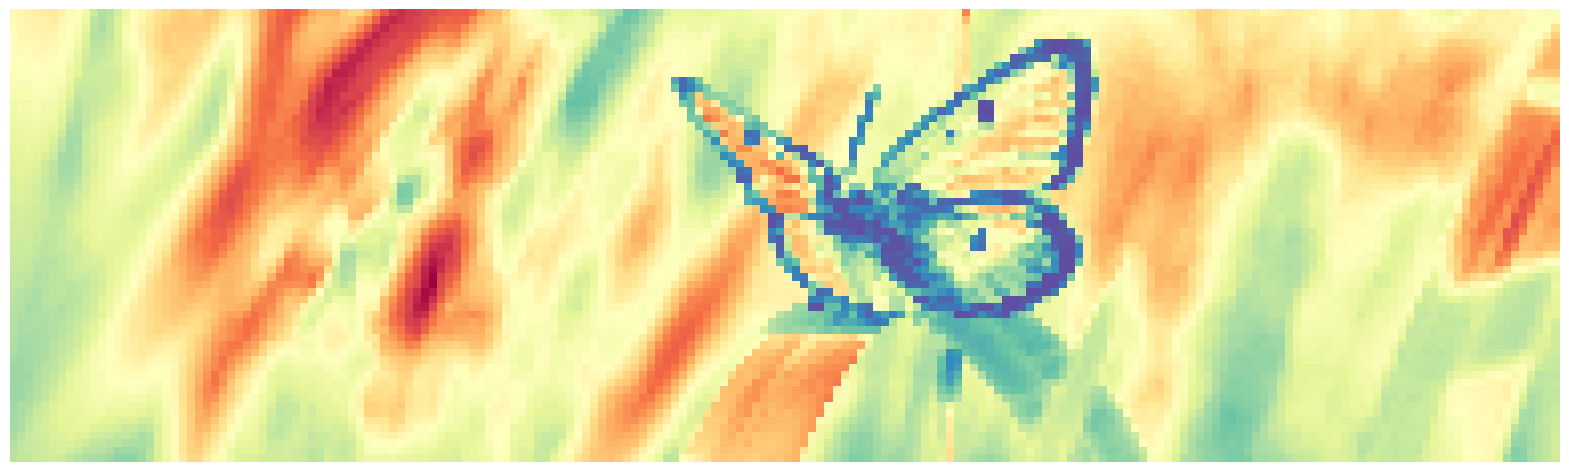

In [12]:
my_dpi=96
plt.figure(figsize=(2000/my_dpi, 600/my_dpi), dpi=my_dpi)
sns.heatmap(util.invert(max_view),xticklabels=False,yticklabels=False,cmap="Spectral",cbar=False)
plt.savefig("Spectral.png",bbox_inches='tight')

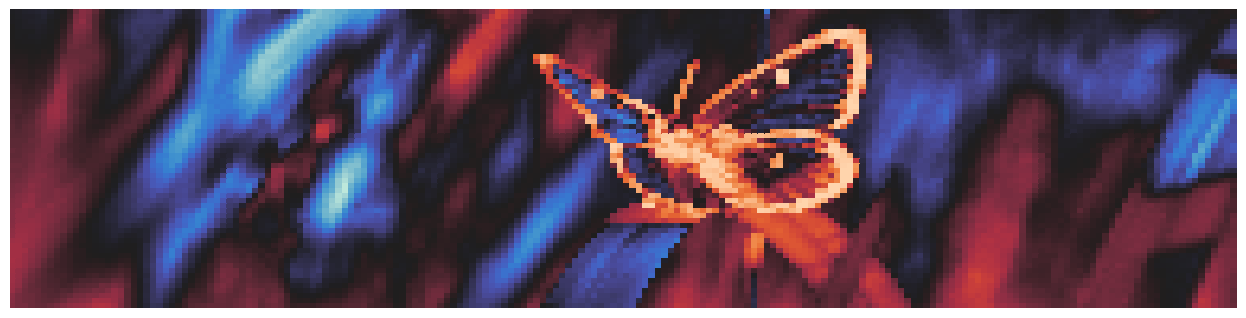

In [13]:
my_dpi=96
plt.figure(figsize=(1584/my_dpi, 396/my_dpi), dpi=my_dpi)
sns.heatmap(util.invert(max_view),xticklabels=False,yticklabels=False,cmap="icefire",cbar=False)
plt.savefig("icefire.png",bbox_inches='tight')